In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


# 14 day

In [ ]:
df = pd.read_csv("/content/PCA_14_day_GOOG.csv")
df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sentiment_Score,Label
0,0,2.804065,2.952921,-0.638544,14.339904,5.407572,0.203686,5.684235,7.245236,0.993206,1.280932,0.128385,117.712502
1,1,-0.302855,-3.405037,-2.747694,12.637511,3.257758,2.205963,2.180499,4.585362,-0.236107,1.225080,0.278175,117.836998
2,2,-0.506649,-3.355465,-3.241286,11.961465,4.796785,1.494403,2.288143,4.129847,-0.659918,2.005884,0.133065,119.067497
3,3,-0.582392,-3.410465,-2.748757,12.107116,3.263371,2.023460,1.857689,3.843731,-0.544430,3.503404,0.384975,119.934502
4,4,-0.187540,-2.121625,-3.563153,10.931603,4.909235,1.132637,1.866840,3.450705,-0.708146,1.529989,0.092400,117.083000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,639,-0.256212,9.616643,-3.202179,-3.715002,1.330805,2.178555,2.582037,-1.121326,-0.401933,1.348051,0.119515,136.380005
640,640,0.304050,9.921760,-2.444309,-2.941957,-0.729237,3.040901,2.016368,-0.843766,-0.230731,0.969965,-0.229520,138.699997
641,641,-0.000117,8.365343,-0.787163,-1.899086,-3.118464,2.239896,0.781013,0.769461,-0.713978,0.379792,0.113830,136.940002
642,642,0.328511,8.676756,-0.752715,-1.975092,-2.263029,1.185599,0.562438,0.731027,-1.251329,1.486135,0.175210,137.919998


In [ ]:
X = df.drop(df.columns[[0,-1]], axis=1)
X_train = X.iloc[:int(len(X)*0.8)]
X_test = X.iloc[int(len(X)*0.8):]

y = df[df.columns[-1]]
y_train = y.iloc[:int(len(y)*0.8)]
y_test = y.iloc[int(len(y)*0.8):]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape the data to be 3D for LSTM input (assuming 11 features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=512, return_sequences=True))
model.add(LSTM(units=1024, return_sequences=True))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)


Epoch 1/20
33/33 [==============================] - 19s 236ms/step - loss: 0.1637 - val_loss: 0.0353
Epoch 2/20
33/33 [==============================] - 5s 151ms/step - loss: 0.0739 - val_loss: 0.0424
Epoch 3/20
33/33 [==============================] - 5s 139ms/step - loss: 0.0306 - val_loss: 0.0090
Epoch 4/20
33/33 [==============================] - 5s 167ms/step - loss: 0.0145 - val_loss: 0.0287
Epoch 5/20
33/33 [==============================] - 5s 144ms/step - loss: 0.0112 - val_loss: 0.0253
Epoch 6/20
33/33 [==============================] - 5s 141ms/step - loss: 0.0116 - val_loss: 0.0137
Epoch 7/20
33/33 [==============================] - 5s 166ms/step - loss: 0.0103 - val_loss: 0.0217
Epoch 8/20
33/33 [==============================] - 5s 152ms/step - loss: 0.0108 - val_loss: 0.0416
Epoch 9/20
33/33 [==============================] - 5s 155ms/step - loss: 0.0107 - val_loss: 0.0180
Epoch 10/20
33/33 [==============================] - 5s 156ms/step - loss: 0.0113 - val_loss: 0.022

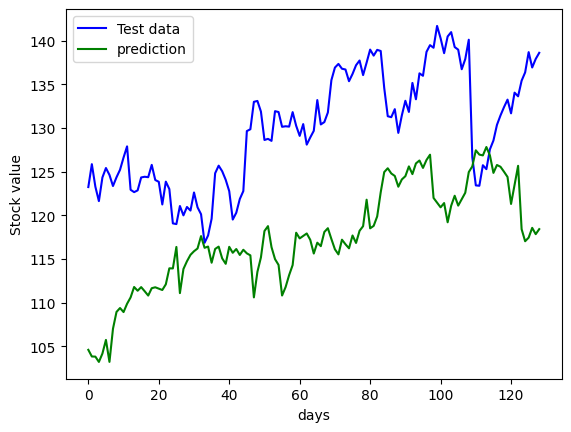

In [ ]:
plt.plot(scaler.inverse_transform(y_test), label='Test data', color='blue')
plt.plot(predictions, label='prediction', color='green')

# Adding labels and a legend
plt.xlabel('days')
plt.ylabel('Stock value')
plt.legend()

# Display the plot
plt.show()

# next day

In [ ]:
df = pd.read_csv("/content/PCA_14_day_GOOG.csv")
df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sentiment_Score,Label
0,0,2.804065,2.952921,-0.638544,14.339904,5.407572,0.203686,5.684235,7.245236,0.993206,1.280932,0.128385,117.712502
1,1,-0.302855,-3.405037,-2.747694,12.637511,3.257758,2.205963,2.180499,4.585362,-0.236107,1.225080,0.278175,117.836998
2,2,-0.506649,-3.355465,-3.241286,11.961465,4.796785,1.494403,2.288143,4.129847,-0.659918,2.005884,0.133065,119.067497
3,3,-0.582392,-3.410465,-2.748757,12.107116,3.263371,2.023460,1.857689,3.843731,-0.544430,3.503404,0.384975,119.934502
4,4,-0.187540,-2.121625,-3.563153,10.931603,4.909235,1.132637,1.866840,3.450705,-0.708146,1.529989,0.092400,117.083000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,639,-0.256212,9.616643,-3.202179,-3.715002,1.330805,2.178555,2.582037,-1.121326,-0.401933,1.348051,0.119515,136.380005
640,640,0.304050,9.921760,-2.444309,-2.941957,-0.729237,3.040901,2.016368,-0.843766,-0.230731,0.969965,-0.229520,138.699997
641,641,-0.000117,8.365343,-0.787163,-1.899086,-3.118464,2.239896,0.781013,0.769461,-0.713978,0.379792,0.113830,136.940002
642,642,0.328511,8.676756,-0.752715,-1.975092,-2.263029,1.185599,0.562438,0.731027,-1.251329,1.486135,0.175210,137.919998


In [ ]:
X = df.drop(df.columns[[0,-1]], axis=1)
X_train = X.iloc[:int(len(X)*0.8)]
X_test = X.iloc[int(len(X)*0.8):]

y = df[df.columns[-1]]
y_train = y.iloc[:int(len(y)*0.8)]
y_test = y.iloc[int(len(y)*0.8):]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape the data to be 3D for LSTM input (assuming 11 features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=512, return_sequences=True))
model.add(LSTM(units=1024, return_sequences=True))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)


Epoch 1/20
33/33 [==============================] - 20s 236ms/step - loss: 0.1804 - val_loss: 0.0839
Epoch 2/20
33/33 [==============================] - 4s 129ms/step - loss: 0.0729 - val_loss: 0.0248
Epoch 3/20
33/33 [==============================] - 5s 149ms/step - loss: 0.0313 - val_loss: 0.0372
Epoch 4/20
33/33 [==============================] - 4s 136ms/step - loss: 0.0129 - val_loss: 0.0237
Epoch 5/20
33/33 [==============================] - 4s 129ms/step - loss: 0.0106 - val_loss: 0.0314
Epoch 6/20
33/33 [==============================] - 5s 154ms/step - loss: 0.0104 - val_loss: 0.0285
Epoch 7/20
33/33 [==============================] - 4s 133ms/step - loss: 0.0104 - val_loss: 0.0335
Epoch 8/20
33/33 [==============================] - 4s 128ms/step - loss: 0.0111 - val_loss: 0.0467
Epoch 9/20
33/33 [==============================] - 5s 153ms/step - loss: 0.0105 - val_loss: 0.0215
Epoch 10/20
33/33 [==============================] - 4s 131ms/step - loss: 0.0112 - val_loss: 0.025

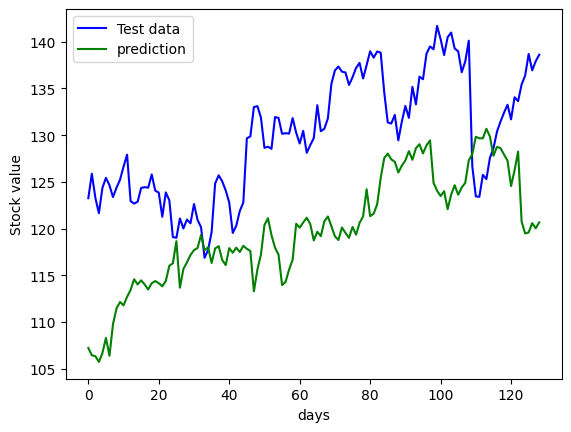

In [ ]:
plt.plot(scaler.inverse_transform(y_test), label='Test data', color='blue')
plt.plot(predictions, label='prediction', color='green')

# Adding labels and a legend
plt.xlabel('days')
plt.ylabel('Stock value')
plt.legend()

# Display the plot
plt.show()